Project idea number 1
What OS has the most vulnerabilities


In [1]:
import numpy as np
import scipy as sp
import pandas as pd

from collections import Counter

In [2]:
vendors = pd.read_csv('vendors.csv.xz', compression='xz', index_col=0)
vendors.columns

Index(['vendor'], dtype='object')

In [3]:
vendor_products = pd.read_csv('vendor_product.csv.xz', compression='xz', index_col=0)
vendor_products

,vendor,product
0,jenkins,google_compute_engine
1,dolibarr,dolibarr
2,mediawiki,mediawiki
3,debian,debian_linux
4,redhat,enterprise_linux
...,...,...
43076,coxco_support,midicart_asp
43077,coxco_support,midicart_asp_maxi
43078,coxco_support,midicart_asp_plus
43079,coxco_support,salescart-pro


In [4]:
products = pd.read_csv('products.csv.xz', compression='xz', header=0, index_col=0)
products.columns

Index(['vulnerable_product'], dtype='object')

## How I Chose My Variables


I will  be pulling 3 windows variables (win10, win2016, and win2019), 1 linux variable (ubuntu 
linux) and finally 1 mac variable. This will be one of the primary challenges. Let me explain. 

First off, I chose these because they are arguably the most popular choices of their "class". 
Most people agree that there is a thing called "the main three".  Window, Linux and Mac.

Windows it predominantly owned and ran by Microsoft. Mac is controlled and ran by Apple, but at 
it's core it is based on BSD Linux. From which there are many distributions derived from. For 
example: openBSD, freeBSD and netBSD to name a few. Yes there are more, some are specialized
for use as a firewall or a storage system. In the Linux camp, there are over 500 distributions.
Like BSD, many are specialized distributions, but many are server and desktop oriented. The most 
popular Linux distributions include Ubuntu, Pop, Fedora and openSUSE. The top chair is in flux 
between Ubuntu and Pop, But I feel Ubuntu has a better market share.


## Know Issues With My Variables

Now back to the comment of challenges with my variables.

Let's start with mac 10. From the mac10 point of view, mac10 is a desktop that many people use. 
However, there is no record "server" release of mac10. Or any other version of mac that I can
remember. By itself, this is find that I could cross compare this with win10 (Microsoft's 
desktop). But I am comparing the Ubuntu Linux Desktop as well.Ubuntu has both a desktop and a 
server release, there is my dilemma. the dataset does not differentiate between desktop and 
server (nor should it). Why? 

The server and desktop release is from the same baseline. So a given binary is more than likely 
the same binary on both server and desktop. But  there are binaries on server and binaries on 
desktop that do not exist on the alternate system. So to be fair, I will include the win2016 
and win2019 to help cross compare more fairly against the windows platform. Now microsoft 
typically release separate patches on the server release vs the desktop vs the other server 
releases. This hint that Microsoft is maintaining separate baselines for each system.

Another dilemma is that Microsoft is known not to be very forthcoming with CVEs. This means 
that there could be far more CVEs against Microsoft products then in the public knowledge base 
of CVEs. And Microsoft have CVEs that they have deemed obsolete in their eyes, meaning it's a 
CVE but they refuse to fix. WTH! That's right, they intentionally leave things vulnerable. 
Why? Don't know! I agree, it is dumb.

So these things make this a difficult analysis of these systems. because mac will not 
participate well not having a server release. 

In [5]:
cves = pd.read_csv('cve.csv.xz',  compression='xz', header=0, index_col=0)
cves.columns

Index(['mod_date', 'pub_date', 'cvss', 'cwe_code', 'cwe_name', 'summary',
       'access_authentication', 'access_complexity', 'access_vector',
       'impact_availability', 'impact_confidentiality', 'impact_integrity'],
      dtype='object')

In [6]:
products

,vulnerable_product
cve_id,
CVE-2019-16548,google_compute_engine
CVE-2019-16547,google_compute_engine
CVE-2019-16546,google_compute_engine
CVE-2013-2092,dolibarr
CVE-2013-2091,dolibarr
...,...
CVE-2007-6444,NaN
CVE-2007-6443,NaN
CVE-2007-6442,NaN


In [7]:
cves

,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
CVE-2019-16548,2019-11-21 15:15:00,2019-11-21 15:15:00,6.8,352,Cross-Site Request Forgery (CSRF),A cross-site request forgery vulnerability in ...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2019-16547,2019-11-21 15:15:00,2019-11-21 15:15:00,4.0,732,Incorrect Permission Assignment for Critical ...,Missing permission checks in various API endpo...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2019-16546,2019-11-21 15:15:00,2019-11-21 15:15:00,4.3,639,Authorization Bypass Through User-Controlled Key,Jenkins Google Compute Engine Plugin 4.1.1 and...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2013-2092,2019-11-20 21:22:00,2019-11-20 21:15:00,4.3,79,Improper Neutralization of Input During Web P...,Cross-site Scripting (XSS) in Dolibarr ERP/CRM...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2013-2091,2019-11-20 20:15:00,2019-11-20 20:15:00,7.5,89,Improper Neutralization of Special Elements u...,SQL injection vulnerability in Dolibarr ERP/CR...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
CVE-2007-6444,2008-01-10 05:00:00,2007-12-19 22:46:00,5.0,20,Improper Input Validation,** REJECT ** DO NOT USE THIS CANDIDATE NUMBER...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2007-6443,2008-01-10 05:00:00,2007-12-19 22:46:00,5.0,119,Improper Restriction of Operations within the...,** REJECT ** DO NOT USE THIS CANDIDATE NUMBER...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2007-6442,2008-01-10 05:00:00,2007-12-19 22:46:00,5.0,119,Improper Restriction of Operations within the...,** REJECT ** DO NOT USE THIS CANDIDATE NUMBER...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2007-6370,2008-01-10 05:00:00,2007-12-15 01:46:00,5.0,119,Improper Restriction of Operations within the...,** REJECT ** DO NOT USE THIS CANDIDATE NUMBER...,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
vendors

,vendor
CVE-2019-16548,jenkins
CVE-2019-16547,jenkins
CVE-2019-16546,jenkins
CVE-2013-2092,dolibarr
CVE-2013-2091,dolibarr
...,...
CVE-2007-6444,NaN
CVE-2007-6443,NaN
CVE-2007-6442,NaN
CVE-2007-6370,NaN


In [9]:
vendor_products

,vendor,product
0,jenkins,google_compute_engine
1,dolibarr,dolibarr
2,mediawiki,mediawiki
3,debian,debian_linux
4,redhat,enterprise_linux
...,...,...
43076,coxco_support,midicart_asp
43077,coxco_support,midicart_asp_maxi
43078,coxco_support,midicart_asp_plus
43079,coxco_support,salescart-pro


In [10]:
products

,vulnerable_product
cve_id,
CVE-2019-16548,google_compute_engine
CVE-2019-16547,google_compute_engine
CVE-2019-16546,google_compute_engine
CVE-2013-2092,dolibarr
CVE-2013-2091,dolibarr
...,...
CVE-2007-6444,NaN
CVE-2007-6443,NaN
CVE-2007-6442,NaN


In [11]:
products.vulnerable_product

cve_id
CVE-2019-16548    google_compute_engine
CVE-2019-16547    google_compute_engine
CVE-2019-16546    google_compute_engine
CVE-2013-2092                  dolibarr
CVE-2013-2091                  dolibarr
                          ...          
CVE-2007-6444                       NaN
CVE-2007-6443                       NaN
CVE-2007-6442                       NaN
CVE-2007-6370                       NaN
CVE-2007-3004                       NaN
Name: vulnerable_product, Length: 180585, dtype: object

In [12]:
#products.cve_id

In [13]:
# newdf = df[(df.origin == "JFK") & (df.carrier == "B6")]
# 2000's
#the_2000s = products['cve_id'].str.contains("CVE-200")
#the_2000s


In [14]:
windows_10 = products.query('vulnerable_product == "windows_10"')
windows_10

,vulnerable_product
cve_id,
CVE-2019-1456,windows_10
CVE-2019-1440,windows_10
CVE-2019-1439,windows_10
CVE-2019-1438,windows_10
CVE-2019-1437,windows_10
...,...
CVE-2017-0183,windows_10
CVE-2017-0182,windows_10
CVE-2017-0186,windows_10


In [15]:
windows_2016 = products.query('vulnerable_product == "windows_server_2016"')
windows_2016

,vulnerable_product
cve_id,
CVE-2019-1456,windows_server_2016
CVE-2019-1440,windows_server_2016
CVE-2019-1439,windows_server_2016
CVE-2019-1438,windows_server_2016
CVE-2019-1437,windows_server_2016
...,...
CVE-2017-0183,windows_server_2016
CVE-2017-0182,windows_server_2016
CVE-2017-0186,windows_server_2016


In [16]:
windows_2019 = products.query('vulnerable_product == "windows_server_2019"')
windows_2019

,vulnerable_product
cve_id,
CVE-2019-1456,windows_server_2019
CVE-2019-1440,windows_server_2019
CVE-2019-1439,windows_server_2019
CVE-2019-1438,windows_server_2019
CVE-2019-1437,windows_server_2019
...,...
CVE-2018-8489,windows_server_2019
CVE-2018-8493,windows_server_2019
CVE-2018-8494,windows_server_2019


In [17]:
ubuntu = products.query('vulnerable_product == "ubuntu_linux"')
ubuntu

,vulnerable_product
cve_id,
CVE-2019-2201,ubuntu_linux
CVE-2013-1429,ubuntu_linux
CVE-2019-17134,ubuntu_linux
CVE-2017-5332,ubuntu_linux
CVE-2019-17266,ubuntu_linux
...,...
CVE-2013-1051,ubuntu_linux
CVE-2012-5624,ubuntu_linux
CVE-2012-2317,ubuntu_linux


In [18]:
mac_os = products.query('vulnerable_product == "mac_os_x"')
mac_os

,vulnerable_product
cve_id,
CVE-2019-11042,mac_os_x
CVE-2019-11041,mac_os_x
CVE-2014-7185,mac_os_x
CVE-2014-1912,mac_os_x
CVE-2013-7040,mac_os_x
...,...
CVE-2009-0160,mac_os_x
CVE-2008-3438,mac_os_x
CVE-2005-1330,mac_os_x


A histogram

In [19]:
import thinkplot
import thinkstats2

In [20]:
df = products['vulnerable_product']
df

cve_id
CVE-2019-16548    google_compute_engine
CVE-2019-16547    google_compute_engine
CVE-2019-16546    google_compute_engine
CVE-2013-2092                  dolibarr
CVE-2013-2091                  dolibarr
                          ...          
CVE-2007-6444                       NaN
CVE-2007-6443                       NaN
CVE-2007-6442                       NaN
CVE-2007-6370                       NaN
CVE-2007-3004                       NaN
Name: vulnerable_product, Length: 180585, dtype: object

## Variabel Descriptive Info

In [21]:
ubuntu.mean()

/tmp/ipykernel_868203/2055279176.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ubuntu.mean()


Series([], dtype: float64)

## Histograms

In [28]:
ubuntu_count = len(ubuntu)
macos_count = len(mac_os)
win10_count = len(windows_10)
win2016_count = len(windows_2016)
win2019_count = len(windows_2019)



(1871, 1747, 1039, 828, 465)

In [73]:
z = ubuntu_count, macos_count, win10_count, win2016_count, win2019_count
z

(1871, 1747, 1039, 828, 465)

In [74]:
y = ubuntu_count, macos_count, win10_count +  win2016_count + win2019_count
y

(1871, 1747, 2332)

In [66]:
def displayHist(hist):
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel='CVEs (count)', ylabel='frequeny')

In [67]:
hist = thinkstats2.Hist([ubuntu_count, macos_count, win10_count, win2016_count, win2019_count])
hist

Hist({1871: 1, 1747: 1, 1039: 1, 828: 1, 465: 1})

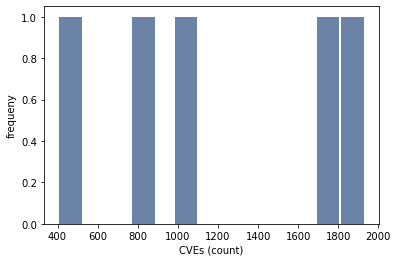

In [68]:
displayHist(hist)

In [47]:
hist = thinkstats2.Hist([ubuntu_count, macos_count, win10_count + win2016_count + win2019_count], label='CVES')
hist

Hist({1871: 1, 1747: 1, 2332: 1}, 'CVES')

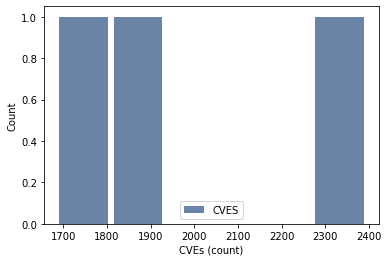

In [48]:
displayHist(hist)


### Means

In [ ]:
def mean(dataset):
    return sum(dataset) / len(dataset)

In [77]:
mean1 = mean(z)
mean1


1190.0

In [80]:
mean2 = mean(y)
mean2


1983.3333333333333

## Median

In [84]:
def median(dataset):
    data = sorted(dataset)
    index = len(data) // 2
    
    # If the dataset is odd  
    if len(dataset) % 2 != 0:
        return data[index]
    
    # If the dataset is even
    return (data[index - 1] + data[index]) / 2

In [86]:
median(z)

1039

In [87]:
median(y)

1871

### Mode

In [81]:
def mode(ls):
    # dictionary to keep count of each value
    counts = {}
    # iterate through the list
    for item in ls:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    # get the keys with the max counts
    return [key for key in counts.keys() if counts[key] == max(counts.values())]


mode(z)

[1871, 1747, 1039, 828, 465]

In [82]:
mode(y)


[1871, 1747, 2332]

## Spread

In [88]:
import statistics

In [89]:
statistics.variance(z)

363370

In [90]:
statistics.variance(y)

95020.33333333333

## tail

No idea other then "tail" but that is the last x rows